In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [19]:
def draw(Ox, Oy: list[list], name: str, scatter: bool = False):
    f = plt.figure(figsize=(7, 7))
    px1 = f.add_subplot(111)
    if not scatter:
        for y in Oy:
            px1.plot(Ox, y, label=name)
    else:
        for y in Oy:
            px1.scatter(Ox, y, label=name)
    px1.legend()
    f.show()

In [5]:
def fx(xvn, yvn, a):
    return -a*((xvn**3)/3-xvn)+a*yvn

def fy(xvn, yvn, c, b):
    return -xvn + c - b*yvn

In [6]:
def newtonsMethod(a, c, T, y, b, x):
    l = [x]
    for i in range(100):
        xn = l[-1]
        f = -xn+(-a*(xn**3/3-xn)+a*((-xn+c)*T+y)/(1+b*T))*T+x
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)
        l.append(l[-1] - f/g)
    return l[-1]

In [7]:
def explicit_method(T, a, xvn, yvn, c, b):
    xn1 = T*fx(xvn, yvn, a) + xvn
    yn1 = T*fy(xvn, yvn, c, b) + yvn
    return (xn1, yn1)

In [8]:
def implicit_method(T, a, xvn, yvn, c, b):
    xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
    yn2 = (T*(-xn2+c) + yvn)/(1+b*T)
    return (xn2, yn2)

In [9]:
def explicit4_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + T/2*kx1, yvn + T/2, a)
    kx3 = fx(xvn + T/2*kx2, yvn + T/2, a)
    kx4 = fx(xvn + T*kx3, yvn + T, a)
    xn = xvn + T/6*(kx1 + 2 * kx2 + 2 * kx3 + kx4)
    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + T/2, yvn + T/2 * ky1, c, b)
    ky3 = fy(xvn + T/2, yvn + T/2 * ky2, c, b)
    ky4 = fy(xvn + T/2, yvn + T * ky3, c, b)
    yn = yvn + T/6*(ky1 + 2 * ky2 + 2 * ky3 + ky4)
    return (xn, yn)

In [11]:
def explicit5_method(T, a, xvn, yvn, c, b):
    pass

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.

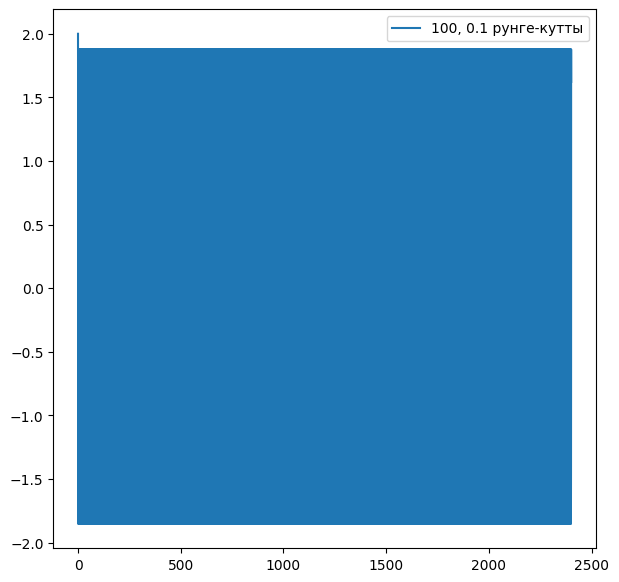

In [49]:
T = 0.01

t_start = 0
t_finish = 200 * 12

# for a in range(1, 1000, 100):
    # b /= 1000
# for c in range(1, 100, 30):
    # c /= 10
    # for b in range(1, 200, 10):
a = 50
c = 0.5
b = 0.740625
tn = t_start
# Первый элемент это x, второй y
# array1 = [(2, 0)]
# array2 = [(2, 0)]
main_array = []
tl = [tn]
while tl[-1] <= t_finish:
    tl.append(tl[-1] + T)
iter = tl[1:]

c = 0.1
a = 100
array3 = [(2, 0)]

array3_dif = []
array3_dif.append((fx(array3[-1][0], array3[-1][1], a),
                    fy(array3[-1][0], array3[-1][1], c, b)))

for _ in iter:
    #явный метод 1-го порядка
    # array1.append(explicit_method(T, a, array1[-1][0], array1[-1][1], c, b))
    #неявный метод 1-го порядка
    # array2.append(implicit_method(T, a, array2[-1][0], array2[-1][1], c, b))
    #метод рунге-кутты 4-го порядка
    array3.append(explicit4_method(T, a, array3[-1][0], array3[-1][1], c, b))
    array3_dif.append((fx(array3[-1][0], array3[-1][1], a),
                    fy(array3[-1][0], array3[-1][1], c, b)))

# arrayx1 = [i[0] for i in array1]
# arrayx2 = [i[0] for i in array2]
arrayx3 = [i[0] for i in array3]
main_array.append(arrayx3)
array_dif_x3 = [[i[0] for i in array3_dif]]
# draw(px1, tl, arrayx1, "явный 1-го порядка")
# draw(px1, tl, arrayx2, "неявный 1-го порядка")
draw(tl, [arrayx3], f"{a}, {c} рунге-кутты")
# draw(tl, array_dif_x3, f"{a} x' from t")
# draw(arrayx3, array_dif_x3, "x' from x")